In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [2]:
boston_dataset = load_boston()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
dir(boston_dataset)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# DATAPOINTS AND features

In [6]:
type(boston_dataset.target)

numpy.ndarray

In [7]:
print(boston_dataset.data.shape)

(506, 13)


In [8]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston_dataset.target # price of the house in k

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Data exploration with pandas dataframes

In [10]:
# create a pandas dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

#Add columns with the price(target)
data["PRICE"] = boston_dataset.target

In [11]:
data.head() # from top
#data.tail() # from bottom
#data.count() # shows no of rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Cleaning datas and check for missing values

In [12]:
data.info()
# is there any null it will return true

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
pd.isnull(data).any() # if there is any null  values in coloumns it will return true

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Visualizing data using Histograms, Distributions and Bar-Chart

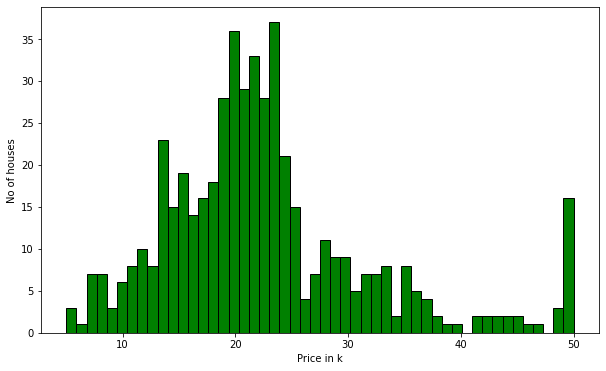

In [15]:
plt.figure(figsize = [10, 6])
plt.xlabel('Price in k')
plt.ylabel('No of houses')
plt.hist(data['PRICE'],bins=50, ec='black',color = 'green')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

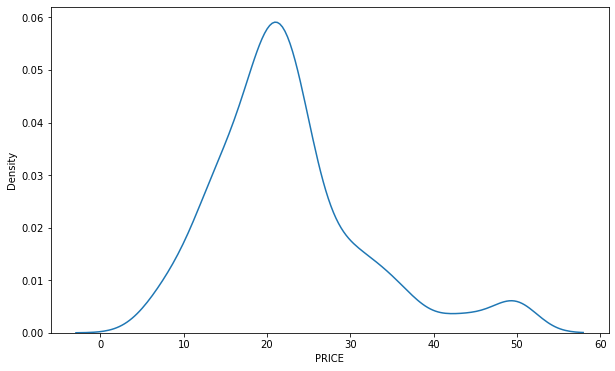

In [16]:
plt.figure(figsize= [10,6])
sns.distplot(data['PRICE'], bins=50,hist = False,kde = True) # Probability density function
plt.show

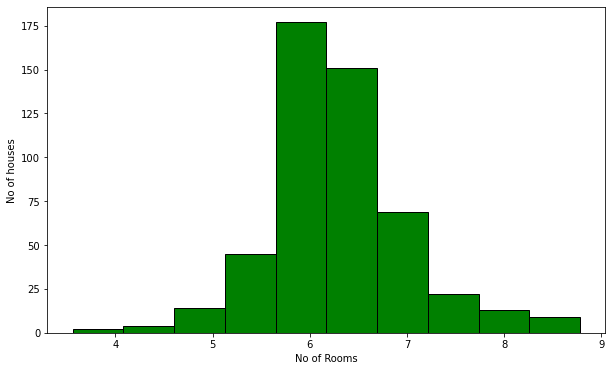

In [17]:
plt.figure(figsize = [10, 6])
plt.xlabel('No of Rooms')
plt.ylabel('No of houses')
plt.hist(data['RM'],bins=10, ec='black',color = 'green')
plt.show()

In [18]:
data['RM'].mean()

6.284634387351787

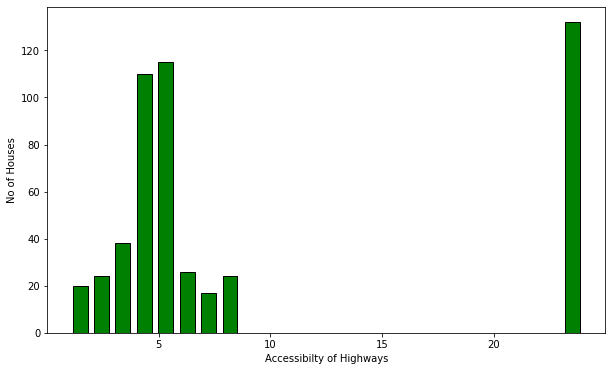

In [19]:
plt.figure(figsize = [10, 6])
plt.xlabel('Accessibilty of Highways')
plt.ylabel('No of Houses')
plt.hist(data['RAD'],bins=24, ec='black',color = 'green',rwidth = 0.7)
plt.show()

In [20]:
freq = data['RAD'].value_counts()
#freq.axes[0]

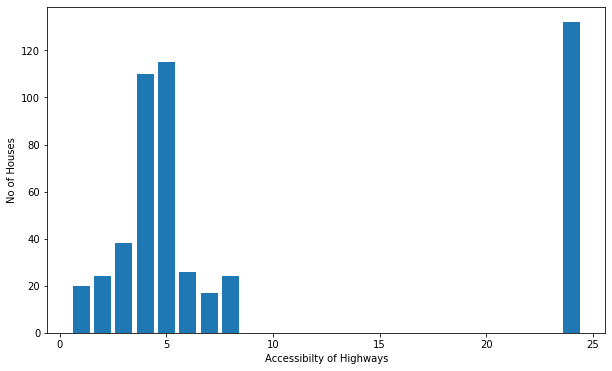

In [21]:
plt.figure(figsize = [10, 6])
plt.xlabel('Accessibilty of Highways')
plt.ylabel('No of Houses')


plt.bar(freq.index, height=freq)
plt.show()

In [22]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [23]:
data['PRICE'].min()

5.0

In [24]:
data['PRICE'].max()

50.0

In [25]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [26]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [27]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

In [28]:
data['PRICE'].corr(data['RM'])

0.6953599470715393

In [29]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375621

In [30]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [31]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<function matplotlib.pyplot.show(close=None, block=None)>

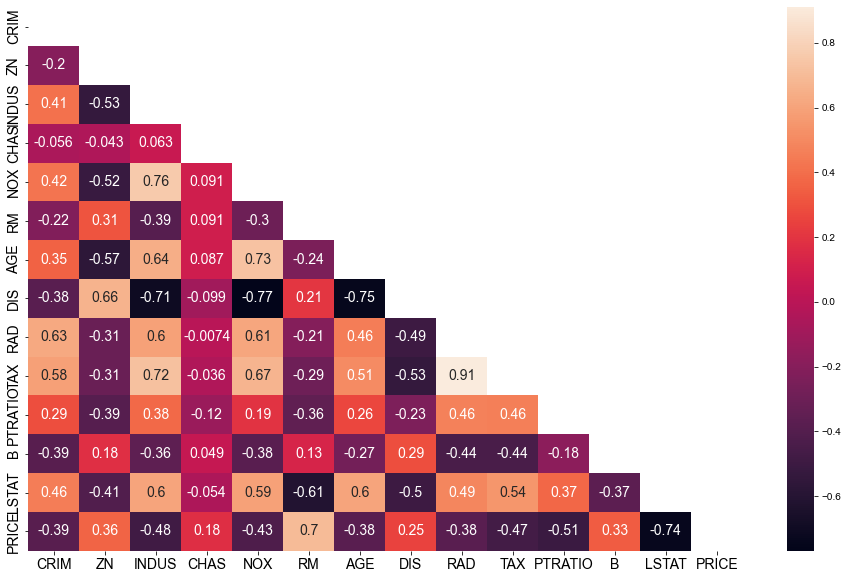

In [32]:
plt.figure(figsize=[16,10])
sns.heatmap(data.corr(),mask = mask,annot=True,annot_kws={'size':14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show

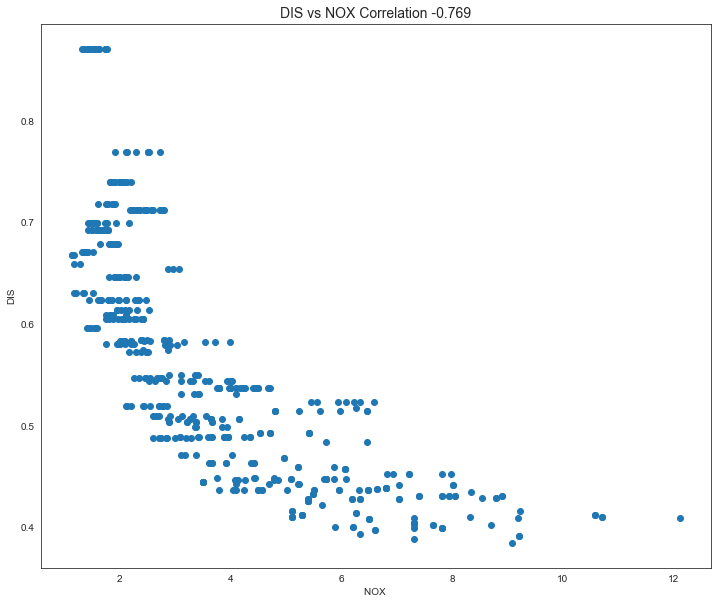

In [33]:
nox_dis_corr = round(data["NOX"].corr(data['DIS']),3)

plt.figure(figsize=[12,10])
plt.title(f"DIS vs NOX Correlation {nox_dis_corr}",fontsize=14)
plt.xlabel("NOX ")
plt.ylabel("DIS")

plt.scatter(x=data['DIS'],y=data["NOX"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


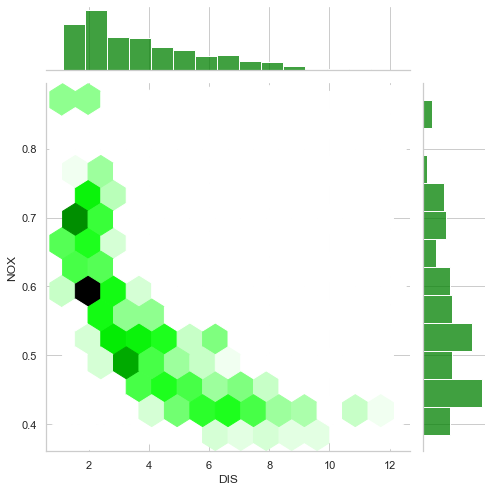

In [34]:
sns.set()
sns.set_style("whitegrid")
sns.jointplot(x=data["DIS"],y=data["NOX"],size=7,color='green',kind='hex')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


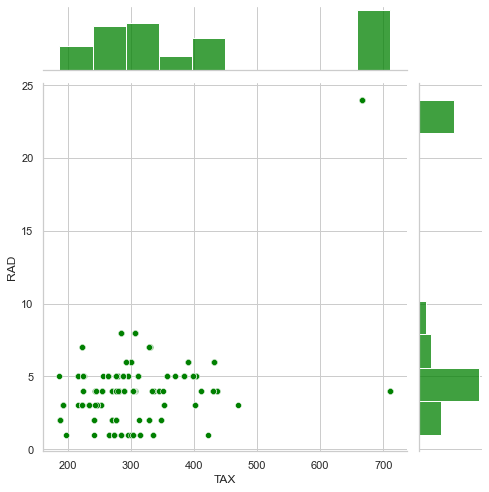

In [35]:
sns.set()
sns.set_style("whitegrid")
sns.jointplot(x=data["TAX"],y=data["RAD"],size=7,color='green')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


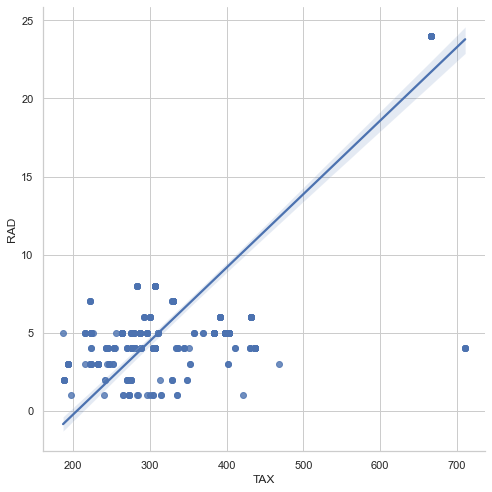

In [36]:
sns.lmplot(x='TAX', y='RAD', data=data,size=7)
plt.show()

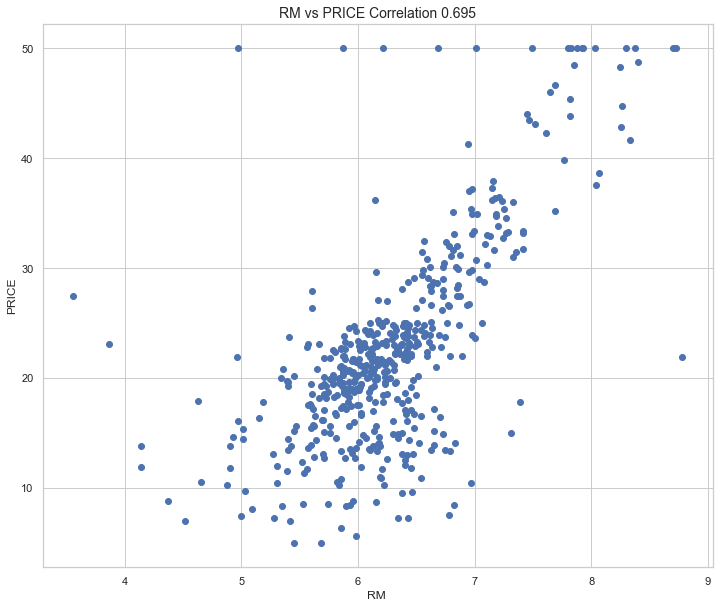

In [37]:
rm_price_corr = round(data["RM"].corr(data['PRICE']),3)

plt.figure(figsize=[12,10])
plt.title(f"RM vs PRICE Correlation {rm_price_corr}",fontsize=14)
plt.xlabel("RM ")
plt.ylabel("PRICE")

plt.scatter(x=data['RM'],y=data["PRICE"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


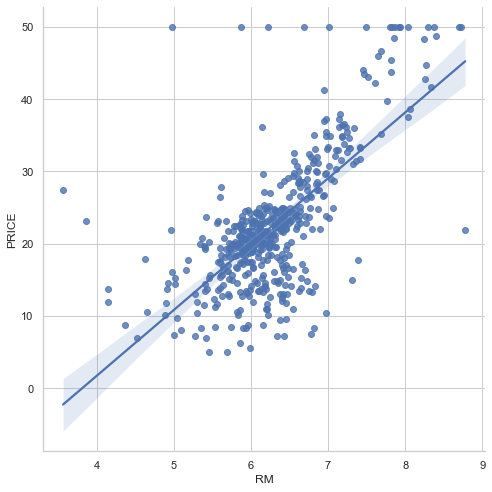

In [38]:
sns.lmplot(x='RM',y='PRICE',size=7, data=data)
plt.show()

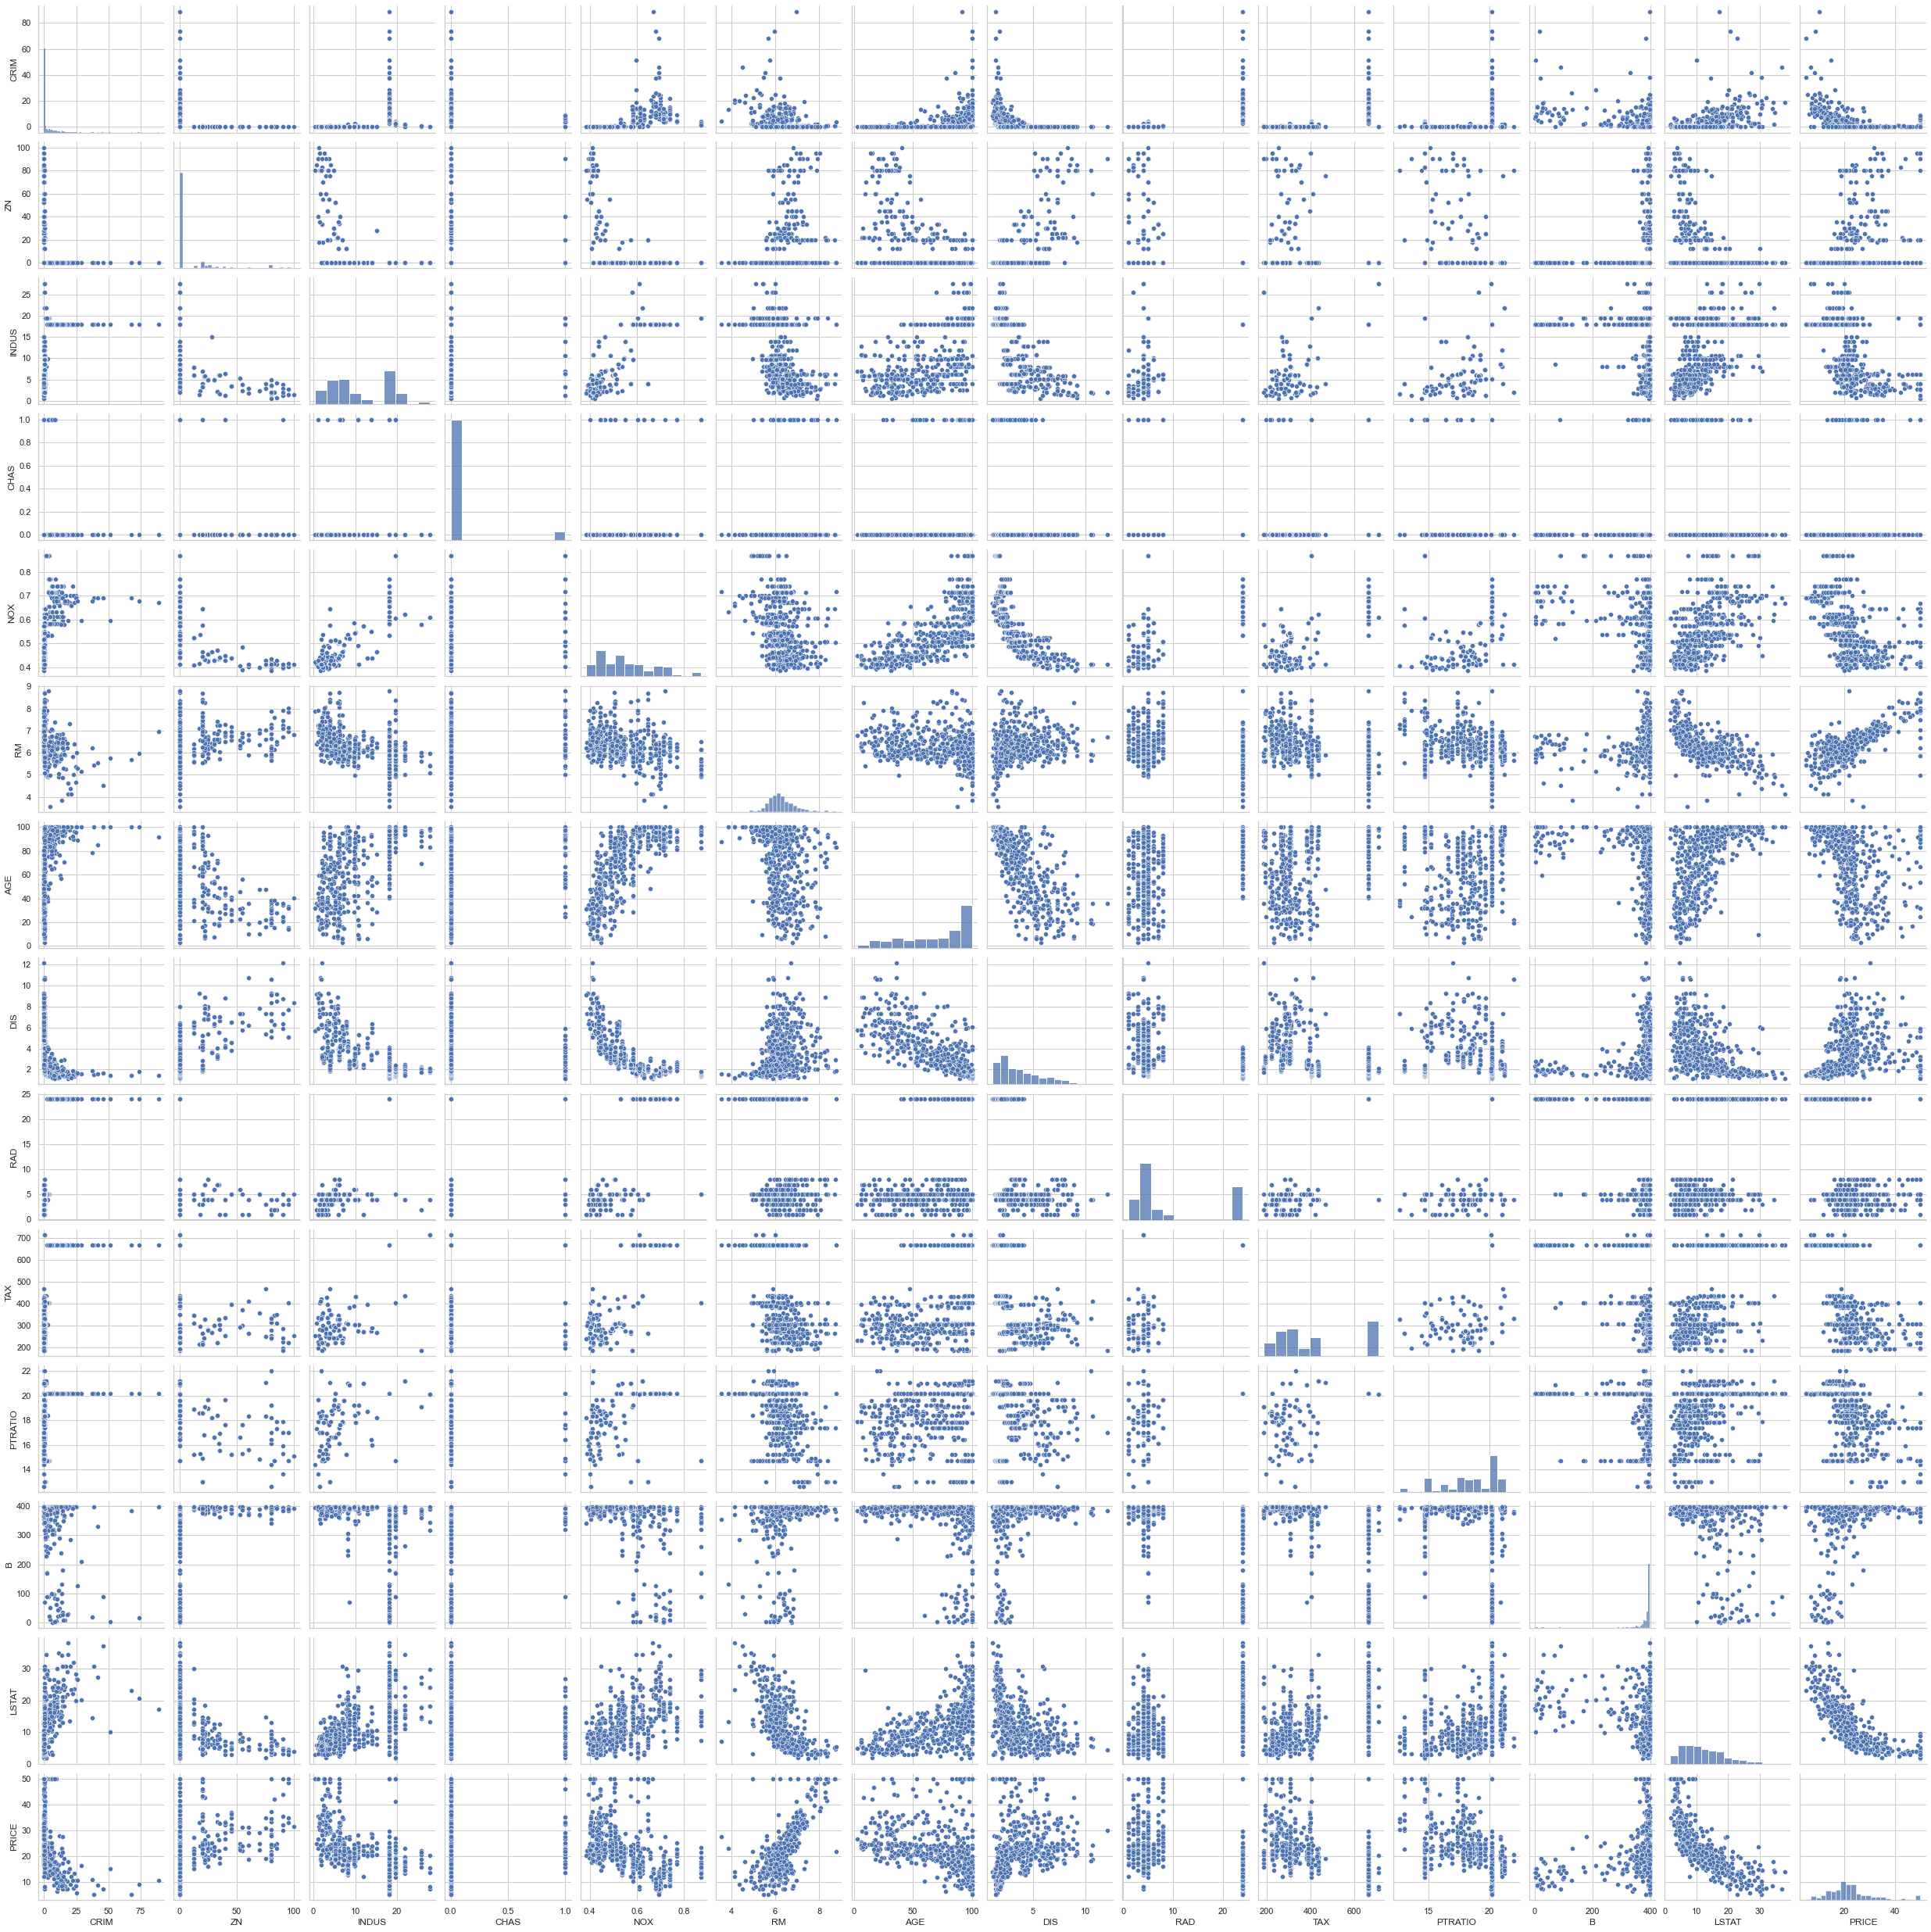

CPU times: total: 21.2 s
Wall time: 21.3 s


In [39]:
%%time

sns.pairplot(data)
plt.show()

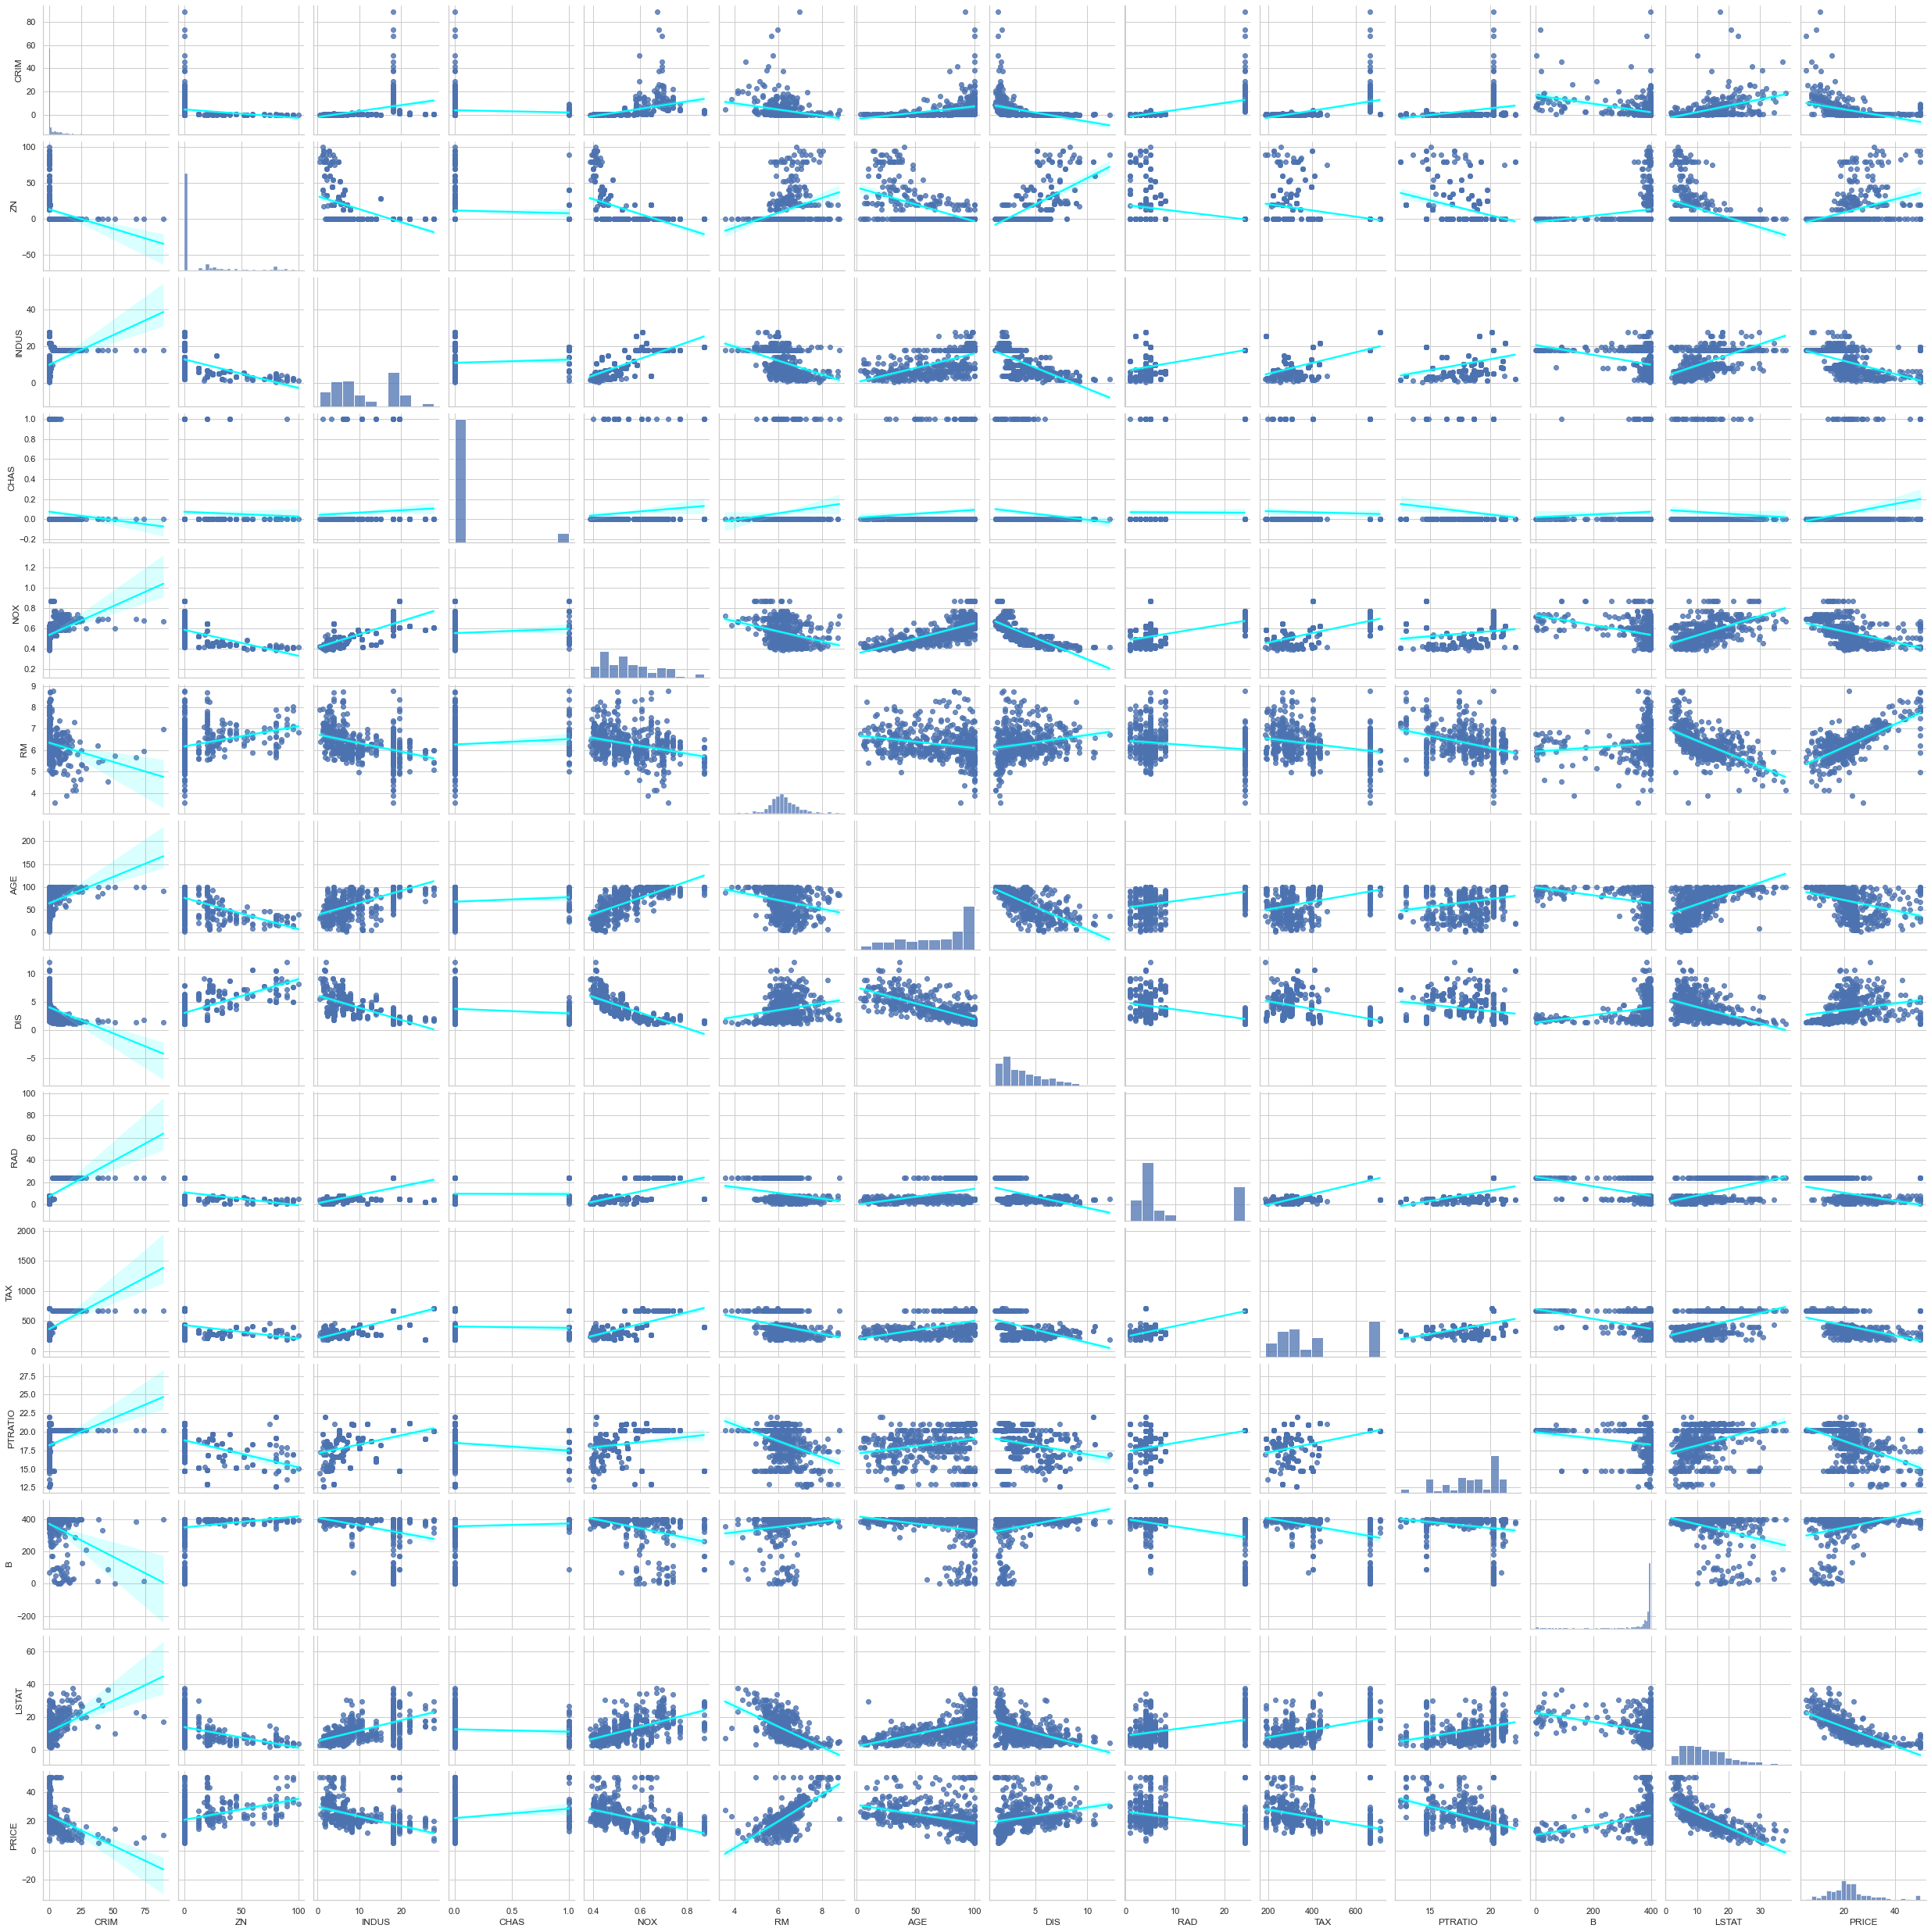

CPU times: total: 2min 10s
Wall time: 37.7 s


In [40]:
%%time

sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

In [41]:
prices= data["PRICE"]

features = data.drop('PRICE',axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size= 0.2, random_state = 10)



In [42]:
#len(x_train)/len(features)


In [43]:
# 1.1
regr = LinearRegression()
regr.fit(x_train, y_train)
print('Intercept:', regr.intercept_)
pd.DataFrame(data=regr.coef_, index =  x_train.columns, columns = ['coef'])


Intercept: 36.53305138282472


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [44]:
# R-squared value for training and test datasets

print("R-square for training data:",regr.score(x_train, y_train))
print("R-square for test data:",regr.score(x_test, y_test))

R-square for training data: 0.750121534530608
R-square for test data: 0.6709339839115642


# Data transformation

In [45]:
#data["PRICE"].tail()
data["PRICE"].skew()

1.1080984082549072

In [46]:
y_log = np.log(data['PRICE'])
y_log.tail()
y_log.skew()

-0.33032129530987864

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


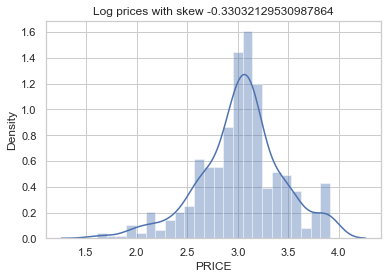

In [47]:
sns.distplot(y_log)
plt.title(f'Log prices with skew {y_log.skew()}')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


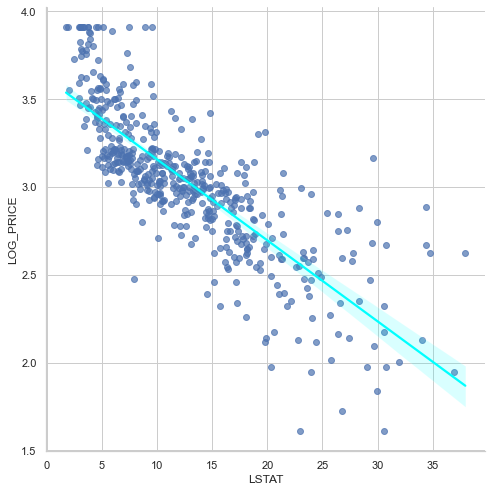

In [48]:
trans_data = features

trans_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=trans_data, size=7, scatter_kws={'alpha': 0.7}, line_kws= {'color':'cyan'})
plt.show()


#  regression using log price

In [49]:
prices=np.log(data["PRICE"])

features = data.drop('PRICE',axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size= 0.2, random_state = 10)

regr = LinearRegression()
regr.fit(x_train, y_train)


print("R-square for training data:",regr.score(x_train, y_train))
print("R-square for test data:",regr.score(x_test, y_test))

print('Intercept:', regr.intercept_)
pd.DataFrame(data=regr.coef_, index =  x_train.columns, columns = ['coef'])



R-square for training data: 0.7930234826697583
R-square for test data: 0.7446922306260737
Intercept: 4.059943871775207


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


# P-values and evaluating coefficients

In [50]:
x_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

results.params
results.pvalues

pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues,3)})

,coef,p-values
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


In [51]:
variance_inflation_factor(exog=x_incl_const.values, exog_idx = 1)

1.7145250443932485

In [52]:
x_incl_const.shape[1]

14

In [53]:
for i in range(14):
    print(variance_inflation_factor(exog=x_incl_const.values, exog_idx = i))

597.5487126763895
1.7145250443932485
2.3328224265597584
3.943448822674636
1.0788133385000576
4.410320817897635
1.8404053075678573
3.3267660823099408
4.222923410477862
7.314299817005058
8.508856493040817
1.839911632651406
1.3386713255364715
2.812544292793036


In [54]:
vif = []
for i in range(14):
    vif.append(variance_inflation_factor(exog=x_incl_const.values, exog_idx = i))
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000576, 4.410320817897635, 1.8404053075678573, 3.3267660823099408, 4.222923410477862, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793036]


In [55]:
vif = [variance_inflation_factor(exog=x_incl_const.values, exog_idx = i)for i in range(14)]
pd.DataFrame({'coef_name': x_incl_const.columns, 'vif':np.around(vif,2)})


,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


# Model Simplification and BIC

In [56]:
# original model
x_incl_const = sm.add_constant(x_train)


model = sm.OLS(y_train, x_incl_const)
results = model.fit()


org_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues,3)})
print('BIC:',results.bic)
print('Rsquared:',results.rsquared)

BIC: -139.74997769478898
Rsquared: 0.7930234826697584


In [57]:
# reduced model 1)excluding INDUS
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['INDUS'],axis=1)

model = sm.OLS(y_train,x_incl_const)
results = model.fit()


coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues,3)})
print('BIC:',results.bic)
print('Rsquared:',results.rsquared)

BIC: -145.14508855591185
Rsquared: 0.7927126289415164


In [58]:
# reduced model 2)excluding AGE and AGE
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['AGE','INDUS'],axis=1)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()


reduced_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues,3)})
print('BIC:',results.bic)
print('Rsquared:',results.rsquared)

BIC: -149.49934294224678
Rsquared: 0.7918657661852816


In [59]:
frames = [org_coef, coef_minus_indus,reduced_coef]
pd.concat(frames,axis=1)

,coef,p-values,coef,p-values,coef,p-values
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


<function matplotlib.pyplot.show(close=None, block=None)>

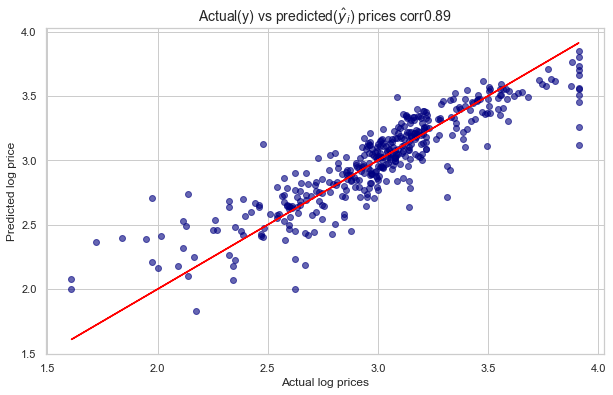

In [80]:
prices=np.log(data["PRICE"])

features = data.drop([ 'PRICE','AGE','INDUS'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size= 0.2, random_state = 10)


x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()


# residuals
residuals = y_train - results.fittedvalues
#residuals
#results.resid
plt.figure(figsize=[10,6])
corr = round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train, y=results.fittedvalues, c='navy',alpha=0.6)
plt.plot(y_train, y_train,color='red')
plt.xlabel("Actual log prices")
plt.ylabel('Predicted log price')
plt.title(f"Actual(y) vs predicted($\hat y_i$) prices corr{ corr}", fontsize = 14)
plt.show





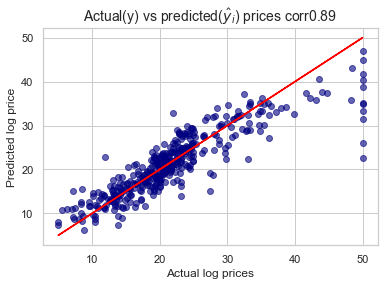

In [66]:

#graph in log values
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='navy',alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train,color='red')
plt.xlabel("Actual log prices")
plt.ylabel('Predicted log price')
plt.title(f"Actual(y) vs predicted($\hat y_i$) prices corr{ corr}", fontsize = 14)

plt.show()



In [61]:
print(results.fittedvalues)
abc = y_train - results.fittedvalues
abc

50     3.036761
367    2.641618
34     2.636558
78     3.010481
172    3.106591
         ...   
320    3.210937
15     3.023876
484    2.950400
125    3.054849
265    3.341354
Length: 404, dtype: float64


50    -0.056143
367    0.498215
34    -0.033868
78     0.043520
172    0.033242
         ...   
320   -0.041251
15    -0.033156
484    0.074891
125    0.008542
265   -0.214594
Length: 404, dtype: float64